## Jon Ishaque 
## ATU. HDip Dat Analytics Machine Learning and Statistics
## 01. Statistics


<h3 style="color: #001a79;">Exercise 1.1</h3>

<hr style="border-top: 1px solid #001a79;" />


The above gives about a 1.5% chance of randomly selecting the correct cups. Calculate the minimum number of cups of tea required to ensure the probability of randomly selecting the correct cups is less than or equal to 1%.



Adapted from:https://stackoverflow.com/a/4941932 to get combinations

In [1]:
#math module
from math import comb
    

In [2]:
#number of ways of selecting 4 cups from 8
comb(8,4)

70

In [3]:
#number of ways of selecting 5 cups from 10
comb(10,5)

252

In [4]:
#Probability of randomly selecting correct 5 cups is:
1.0/comb(10,5)
    

0.003968253968253968

So, if experiement done with 10 cups total, 5 with milk first, 5 with tea first then the probability of randomly selecting the correct answer is less than 1%.

Of course, we could design the experiment with 9 cups in total, 4 tea in first,5 milk in first.


In [5]:
#randomly select 4 cups from 9
#Probability of randomly selecting correct 5 cups is:
1.0/comb(9,4)

0.007936507936507936

This is closer to 1 percent.

In [6]:
#randomly select 5 cups from 9
#Probability of randomly selecting correct 5 cups is:
1.0/comb(9,5)

0.007936507936507936

This is the same as 4 from 9 as to get the 4 from 9 you will get the 5 other cups from 9.


<h3 style="color: #001a79;">Bonus:</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">How many would be required if you were to let the taster get one cup wrong while maintaining the 1% threshold?.</i>

To  the answer to the bonus question I have used the notebook from the lecture where I define the number of cups in list
and the distribution chart which shows the number number of chances of getting 4 right,3 right, 2 right etc.
I have repeatedly ran the cells whilst incrementing the number of cups in the list each time until 3 right will maintain a 1% probablity

In [7]:
# The labeled cups cups.

cups = list(range(18))

#number of ways of selecting 4 cups from 18
comb(18,4)

3060

The 3060 possibilities can be enumerated using the combinations function from the itertools Python package.

It takes a list 𝑙 of items(cups) and a number 𝑛 (4) . It returns/generates each way of selecting 𝑛 unordered items from 𝑙 . 

In [8]:
import itertools
#get 
poss = list(itertools.combinations(cups, 4))
#poss #possible combinations

[Text(0.5, 0, 'No. correct cups'),
 Text(0, 0.5, 'Possiblities'),
 Text(0.5, 1.0, 'Distribution chart for Lady Tasting Tea experiment')]

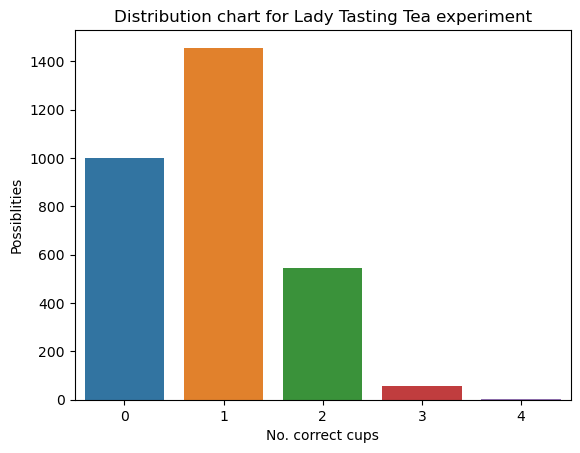

In [9]:
import random
import seaborn as sns # for count plot


# Pick a random correct answer from the list of 495 to simulate the experiment.
milkfirst = set(random.choice(poss)) #


#So to allow one wrong cup -  (3 right below) 30 ways of getting 3 cups right (30/330 approx 1%)

counts = [len(milkfirst & set(i)) for i in itertools.combinations(cups, 4)]

# Creat the plot.
tea_exp = sns.countplot(x=counts);

tea_exp.set(xlabel ="No. correct cups", ylabel = "Possiblities", title ='Distribution chart for Lady Tasting Tea experiment')

In [10]:
30/3060 *100

0.9803921568627451

### Running the experiment with 18 Cups there 30 combinations of one wrong cup out of 3060 possible combinations of 4 cup so to allow one wrong cup the experiment will need 18 cups.

<h3 style="color: #001a79;">Exercise 1.2</h3>

<hr style="border-top: 1px solid #001a79;" />

<i style="color: #001a79;">Remember to do these exercises in your own notebook in your assessment repository.</i>

Use <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.fisher_exact.html" style="color: #ff791e">scipy's version of Fisher's exact test</a> to simulate the Lady Tasting Tea problem.

In [11]:
#statistical methods.
import scipy.stats as ss

In [12]:
ss.fisher_exact

<function scipy.stats.stats.fisher_exact(table, alternative='two-sided')>

So, the SciPy fisher_exact function takes a table and an optional alternaive as parameters.

To emulate the Tea tasting problem using the fisher_exact function I will need to get this probability.
Target: 0.014285714285714285

The table is a 2-dimensional list. eg [[8,2],[1,5]]
In our case the columns could be Tea First, Milk First
and the rows could be the actual outcomes.
So in this limited table of outcomes(rows) we could say:

[4,0] i.e. 4 cups were correctly as Tea First 

and 

[0,4] i.e. 4 cups selected as Milk First  

The whole list would be: [[4,0],[0,4]]

In [19]:
#to make make code more efficient I will define the table here
table=[[4, 0], [0, 4]]

In [20]:
ss.fisher_exact(table)

(inf, 0.028571428571428536)

In [14]:
0.014285714285714285 * 2 #fisher comes out 2 x prob from lecture content.

0.02857142857142857

When I use the 'greater' alternative parameter I get 1.4 percent probabability. Why?

In [16]:
ss.fisher_exact(table,'greater')

(inf, 0.014285714285714268)

Because it is the alternavive hypothesis, Fisher's hypotheses was the Null hypotheses that the lady could not tell how which was poured first. The alternative is that she can tell, and there is a 1.4 percent that would occur randomly. So what is the first number returned without an alternative parameter, i.e, 0.02857142857142857.

In [17]:
ss.fisher_exact(table,'two-sided')

(inf, 0.028571428571428536)

According to the documentation is the default alternative hypotheses'two-sided'. As our experiment is symetric, that is 4 right cups is the same as 4 wrong cups, I think the 2.8 percent probability is that of having 4 right or 4 wrong.